In [50]:
# 步驟1: 安裝必要的套件
# 這個步驟是為了下載中文字型檔案，讓圖表能夠正確顯示中文
# 學生可以透過 prompt: "安裝 wget 套件用於下載檔案"
!pip install wget

In [51]:
# 步驟2: 下載中文字型檔案
# 這個步驟是為了確保 matplotlib 圖表能夠正確顯示中文字體
# 學生可以透過 prompt: "下載中文字型檔案並導入 wget 模組"
# 必需檢查是否已經下載過字型，避免重複下載
import wget
import os
if not os.path.exists('ChineseFont.ttf'):
    url = 'https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf'
    filename = wget.download(url)
else:
    filename = 'ChineseFont.ttf'



### 如何使用 scikit-learn 的 KNeighborsClassifier 模型來進行分類
- 我們將使用一個簡單的數據集，其中包含兩個特徵（例如，花瓣長度和花瓣寬度），並預測鳶尾花的種類（0、1 或 2）。

In [52]:
# 步驟3: 導入必要的套件和設定中文字型
# 學生可以透過 prompt: "導入機器學習所需的套件包括 numpy, matplotlib, sklearn 等"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont(filename)
mlp.rcParams['font.family'] = 'ChineseFont'


In [53]:
# 步驟4: 載入鳶尾花數據集
# 學生可以透過 prompt: "載入 sklearn 內建的鳶尾花數據集並提取前兩個特徵"
from sklearn.datasets import load_iris

iris = load_iris()

# 只使用後兩個特徵：花萼長度和花萼寬度
X = iris.data[:, :2]

# 查看數據集的形狀
print("特徵矩陣形狀:", X.shape)

# 目標變數：鳶尾花種類 (0, 1, 2)
y = iris.target

# 查看目標變數的形狀
print("目標變數形狀:", y.shape)

特徵矩陣形狀: (150, 2)
目標變數形狀: (150,)


In [54]:
# 步驟5: 分割訓練集和測試集
# 學生可以透過 prompt: "將數據集分割成訓練集和測試集，測試集佔 20%"
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("訓練集形狀:", X_train.shape, y_train.shape)
print("測試集形狀:", X_test.shape, y_test.shape)


訓練集形狀: (120, 2) (120,)
測試集形狀: (30, 2) (30,)


In [55]:
# 步驟6: 建立 KNN 分類模型
# 學生可以透過 prompt: "建立 K 近鄰分類器，設定 k=3"
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=6) # 設定 k=6，表示考慮最近的 6 個鄰居

# 步驟7: 訓練模型
# 學生可以透過 prompt: "使用訓練集來訓練 KNN 模型"
knn_model.fit(X_train, y_train)


,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [56]:
# 步驟8: 進行預測
# 學生可以透過 prompt: "使用訓練好的模型對測試集進行預測"
y_pred = knn_model.predict(X_test)
print("測試集預測結果:", y_pred)

測試集預測結果: [1 0 2 1 1 0 1 1 1 1 2 0 0 0 0 2 1 1 2 2 0 1 0 2 2 1 1 2 0 0]


In [57]:
# 步驟9: 評估模型性能
# 學生可以透過 prompt: "計算模型的準確度並顯示結果"
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"模型準確度: {accuracy * 100:.2f}%")

模型準確度: 76.67%


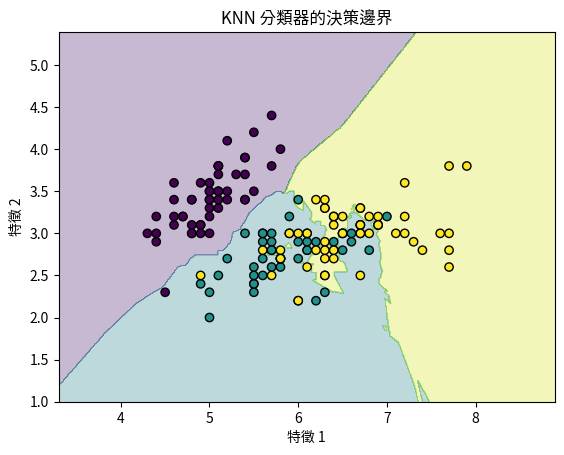

In [58]:
# 步驟10: 可視化決策邊界
# 學生可以透過 prompt: "繪製 KNN 分類器的決策邊界和數據點散佈圖"
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
# 對網格點進行預測
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) # 將預測結果轉換為與網格相同的形狀

# 繪製決策邊界（背景色）
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("KNN 分類器的決策邊界")
plt.xlabel("特徵 1")
plt.ylabel("特徵 2")
plt.show()


In [59]:
## 步驟11: 儲存模型
# 學生可以透過 prompt: "使用 joblib 套件來儲存訓練好的模型"
import joblib

# 模型必需要儲存在**models**資料夾中，請先建立該資料夾
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(knn_model, 'models/knn_iris_model.pkl')


['models/knn_iris_model.pkl']